In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

Data Collection

In [2]:
crime = pd.read_csv("../Clustering/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Normalization function 
def norm_func(i):
   x = (i-i.min())/(i.max()-i.min())
   return (x)


df_norm = norm_func(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


K-Means

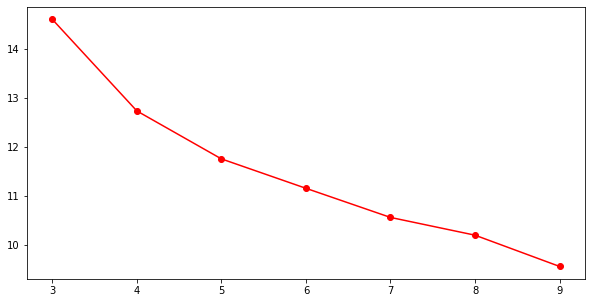

In [4]:
#Generate Elbow Curve

k = list(range(3,10))

Total_WSS=[]

for i in k:
    kmean=KMeans(n_clusters=i).fit(df_norm)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmean.labels_==j,:],kmean.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean" )))
    Total_WSS.append(sum(WSS))

# Scree plot 
plt.figure(figsize=(10,5))
plt.plot(k,Total_WSS,'ro-') 
plt.xticks(k)
plt.show()

In [5]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_norm)

y_kmeans

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [8]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
crime['cluster'] = cluster

In [9]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,3.6,78.5,52.1,12.2
2,11.0,264.0,76.5,33.6
3,13.9,243.6,53.8,21.4
4,5.9,141.2,73.6,19.3


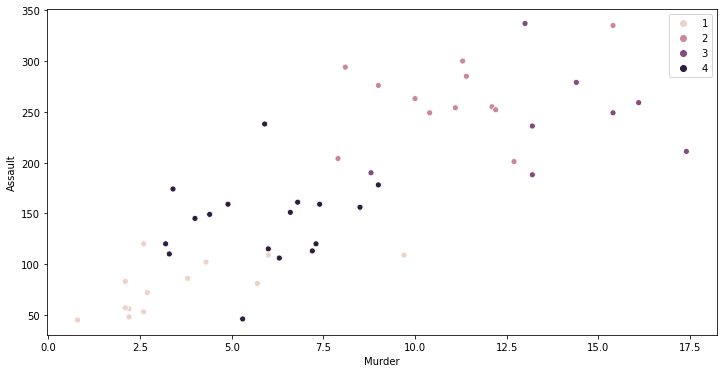

In [11]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['Murder'], y = crime['Assault'],hue=y_kmeans1)

In [13]:
crime[crime['cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
11,Idaho,2.6,120,54,14.2,1
14,Iowa,2.2,56,57,11.3,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
28,New Hampshire,2.1,57,56,9.5,1
33,North Dakota,0.8,45,44,7.3,1
40,South Dakota,3.8,86,45,12.8,1


Insights
Cluster 3 - south western states (however, definition changes for different sources) maxes out in three (Assault, Urbanpop, Rape) out of four crimes.
Cluster 4 stands out for minimum crime rate as the means of 3 crimes are least relative to other crimes
Coincidentally, most of the southern region states belong to cluster 2 where Murders seems to be popular.
The southern states in cluster 4 have more number of average arrests/ 100,000 persons in all the three crime categories than states (half of mid-western states) in cluster 2 in spite of the average Urbanpop (%) being very close. For causality, more variables are needed apart from the number of arrests to understand the inferences like the above. For instance, it could be the density of people or number of people with a different socio-economic statuses in that state.